# DFT calculation of Graphene

In [1]:
from ase import Atoms
from ase.io import write, read
from ase.lattice.hexagonal import *
from ase.visualize import view
from ase.units import Bohr
from gpaw import GPAW, FermiDirac, PoissonSolver, Mixer
from ase.lattice.cubic import BodyCenteredCubic
from ase.build import bulk
from ase.spacegroup import crystal

import numpy as np

Define metal lattice:

In [28]:
Li = bulk("Li", "bcc", a=3.51, cubic=True)
#Li *= (2, 2, 2)
Li.pbc = (True, True, True) #pbc = periodic boundary conditions
view(Li)

#Li = BodyCenteredCubic(symbol='Li', pbc=(1,1,1), latticeconstant=3.51)
#Li = crystal('Li', [(0,0,0)], spacegroup=229, cellpar=[a, a, a, 90, 90, 90])
#Li.pbc = (True, True, True)

In [ ]:
Na = bulk("Na", "bcc", a=4.29, cubic=True)
Na.pbc = (True, True, True)
view(Na * (2,2,2))

In [ ]:
K = bulk("K", "bcc", a=5.33, cubic=True)
K.pbc = (True, True, True)
view(K * (2,2,2)) 

Define calculator parameters and perform calculations to get the potential energy and electron density

In [20]:
calcLi = GPAW(xc='LDA', 
              mode="lcao",
              kpts=(16,16,16),
              h=0.2,
              #nbands=10,
              basis='dzp',
              txt='Li.txt')

Li.set_calculator(calcLi)

eLi = Li.get_potential_energy()

calcLi.write('Li.gpw')

densityLi = calcLi.get_all_electron_density(gridrefinement=4) * Bohr**3
write('Li.cube', Li, data=densityLi)

print(eLi, ' eV')

(-3.9566677718461625, ' eV')


In [ ]:
calcNa = GPAW(xc='LDA', 
            mode="lcao",
            kpts=(2,2,2),
            h=0.2,
            #nbands=20,
            basis='dzp',
            txt='Na.txt')

Na.set_calculator(calcNa)

eNa = Na.get_potential_energy()

calcNa.write('Na.gpw')

densityNa = calcNa.get_all_electron_density(gridrefinement=4) * Bohr**3
write('Na.cube', Na, data=densityNa)

print(eNa, ' eV')

In [ ]:
calcK = GPAW(xc='LDA', 
            mode="lcao",
            kpts=(2,2,2),
            h=0.2,
            #nbands=20,
            basis='dzp',
            txt='K.txt')

K.set_calculator(calcK)

eK = K.get_potential_energy()

calcK.write('K.gpw')

densityK = calcK.get_all_electron_density(gridrefinement=4) * Bohr**3
write('K.cube', K, data=densityK)

print(eK, ' eV')

Restart the calculation and plot DOS:

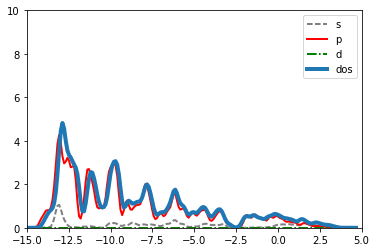

'\nenergy2, dos2 = calc2.get_orbital_ldos(0, spin=0, angular=\'spdf\', width=0.25)\nplt.plot(energy1 - ef1, dos1, label = "graphene")\nplt.plot(energy2 - ef2, dos2, "k", label = "graphite")\nplt.xlabel(r\'$\\epsilon - \\epsilon_F \\ \rm{(eV)}$\')\nplt.xlim([-10,10])\nplt.ylabel(\'Density of States (1/eV)\')\nplt.legend()\nplt.show()'

In [15]:
import sys
import matplotlib.pyplot as plt
from gpaw import GPAW

calcLi = GPAW('Li.gpw', txt=None)

try:
    efLi = calcLi.get_fermi_level()
except ValueError:
    efLi = 0
energyLi, dosLi = calcLi.get_orbital_ldos(0, spin=0, angular='spdf', width=0.25)

enLi = -1. * (energyLi - efLi)

Spdos_Li = [0] * len(dosLi)
Ppdos_Li = [0] * len(dosLi)
Dpdos_Li = [0] * len(dosLi)
temp = calcLi.get_orbital_ldos(0,spin=0, angular='s', width=0.2)[1]
Spdos_Li = list(np.array(Spdos_Li) + np.array(temp))
temp = calcLi.get_orbital_ldos(0,spin=0, angular='p', width=0.2)[1]
Ppdos_Li = list(np.array(Ppdos_Li) + np.array(temp))
temp = calcLi.get_orbital_ldos(0, spin=0, angular='d', width=0.2)[1]
Dpdos_Li = list(np.array(Dpdos_Li) + np.array(temp))

plt.plot(enLi, Spdos_Li, color='0.5' ,ls='--', linewidth = 2.0, label = 's')

plt.plot(enLi, Ppdos_Li, 'r-',linewidth = 2.0, label = 'p')
plt.plot(enLi, Dpdos_Li, 'g-.',linewidth = 2.0, label = 'd')
plt.plot(enLi, dosLi, linewidth = 4.0, label='dos')

plt.xlim(-15,5)
plt.ylim(0,10)
plt.legend()
plt.show()

"""
energy2, dos2 = calc2.get_orbital_ldos(0, spin=0, angular='spdf', width=0.25)
plt.plot(energy1 - ef1, dos1, label = "graphene")
plt.plot(energy2 - ef2, dos2, "k", label = "graphite")
plt.xlabel(r'$\epsilon - \epsilon_F \ \rm{(eV)}$')
plt.xlim([-10,10])
plt.ylabel('Density of States (1/eV)')
plt.legend()
plt.show()"""

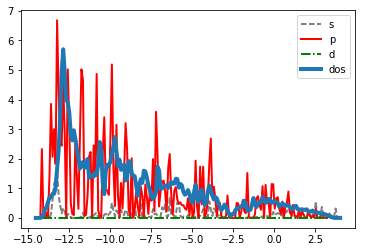

'\nenergy2, dos2 = calc2.get_orbital_ldos(0, spin=0, angular=\'spdf\', width=0.25)\nplt.plot(energy1 - ef1, dos1, label = "graphene")\nplt.plot(energy2 - ef2, dos2, "k", label = "graphite")\nplt.xlabel(r\'$\\epsilon - \\epsilon_F \\ \rm{(eV)}$\')\nplt.xlim([-10,10])\nplt.ylabel(\'Density of States (1/eV)\')\nplt.legend()\nplt.show()'

In [27]:
import sys
import matplotlib.pyplot as plt
from gpaw import GPAW

calcLi = GPAW('Li.gpw', txt=None)

try:
    efLi = calcLi.get_fermi_level()
except ValueError:
    efLi = 0
energyLi, dosLi = calcLi.get_orbital_ldos(0, spin=0, angular='spdf', width=0.1)

enLi = -1. * (energyLi - efLi)

Spdos_Li = [0] * len(dosLi)
Ppdos_Li = [0] * len(dosLi)
Dpdos_Li = [0] * len(dosLi)
temp = calcLi.get_orbital_ldos(0,spin=0, angular='s', width=0.01)[1]
Spdos_Li = list(np.array(Spdos_Li) + np.array(temp))
temp = calcLi.get_orbital_ldos(0,spin=0, angular='p', width=0.01)[1]
Ppdos_Li = list(np.array(Ppdos_Li) + np.array(temp))
temp = calcLi.get_orbital_ldos(0, spin=0, angular='d', width=0.01)[1]
Dpdos_Li = list(np.array(Dpdos_Li) + np.array(temp))

plt.plot(enLi, Spdos_Li, color='0.5' ,ls='--', linewidth = 2.0, label = 's')

plt.plot(enLi, Ppdos_Li, 'r-',linewidth = 2.0, label = 'p')
plt.plot(enLi, Dpdos_Li, 'g-.',linewidth = 2.0, label = 'd')
plt.plot(enLi, dosLi, linewidth = 4.0, label='dos')

#plt.xlim(-4,4)
#plt.ylim(0,1)
plt.legend()
plt.show()

"""
energy2, dos2 = calc2.get_orbital_ldos(0, spin=0, angular='spdf', width=0.25)
plt.plot(energy1 - ef1, dos1, label = "graphene")
plt.plot(energy2 - ef2, dos2, "k", label = "graphite")
plt.xlabel(r'$\epsilon - \epsilon_F \ \rm{(eV)}$')
plt.xlim([-10,10])
plt.ylabel('Density of States (1/eV)')
plt.legend()
plt.show()"""

Restart the calculation and plot electrostatic potential

In [ ]:
from ase.units import Hartree
from gpaw import GPAW
import numpy as np
import pylab as plt

calc = GPAW('G2.gpw', txt=None)
calc.restore_state()
v = (calc.hamiltonian.vHt_g * Hartree).mean(0).mean(0)
z = np.linspace(0, calc.atoms.cell[2, 2], len(v), endpoint=False)
plt.plot(z, v, label='xy-averaged potential')
plt.show()